# Notebook : Embeddings


## About

In this notebook, we will explore how to to break the text into manageable chunks using different strategy.

- OpenAI text embeddings
- Multi modality embedding Clip



## Setup

In [1]:
from dotenv import load_dotenv
import sklearn.metrics

In [2]:
dotenv_path = "../env"
if os.path.isfile("env"):
    dotenv_path = "env"
load_dotenv(dotenv_path=dotenv_path)

True

## Text Embeddings

An embedding is a vector (list) of floating point numbers. 

The distance between two vectors measures their relatedness. 

Small distances suggest high relatedness and large distances suggest low relatedness.

[Source: OpenAI docs](https://platform.openai.com/docs/guides/embeddings)

In [3]:
from llama_index.embeddings.openai import OpenAIEmbedding, OpenAIEmbeddingModelType


Avaialable embeddings

| Model Name              | Max Tokens | Embedding Size |
| :---------------- | :------: | ----: |
| text-embedding-3-small        |   8191   |1536 |
| text-embedding-3-large           |   8191  | 3072 |
| text-embedding-ada-002    |  8191   | 1536 |


In [4]:
OpenAIEmbeddingModelType.TEXT_EMBED_3_SMALL

<OpenAIEmbeddingModelType.TEXT_EMBED_3_SMALL: 'text-embedding-3-small'>

In [5]:
embedding_client = OpenAIEmbedding(model=OpenAIEmbeddingModelType.TEXT_EMBED_3_SMALL)

In [6]:
emb_new_york = embedding_client.get_text_embedding("New York")
emb_new_york

[-0.00671778479591012,
 -0.03243451938033104,
 -0.0033206441439688206,
 0.08795707672834396,
 -0.054048262536525726,
 -0.01738557033240795,
 -0.041029948741197586,
 0.02777518890798092,
 0.03529966250061989,
 -0.002626959700137377,
 -0.00409604050219059,
 0.014576062560081482,
 -0.056523967534303665,
 0.0019071971764788032,
 -0.0107720997184515,
 0.017858458682894707,
 -0.011057223193347454,
 0.023866912350058556,
 0.03808135539293289,
 -0.008769282139837742,
 -0.023547017946839333,
 -0.015354936011135578,
 -0.028651420027017593,
 -0.036940861493349075,
 0.02030634693801403,
 0.033908817917108536,
 -0.02132166363298893,
 -0.004520248621702194,
 0.057525377720594406,
 0.006206648889929056,
 0.036050718277692795,
 -0.04172537103295326,
 0.024840503931045532,
 0.00888750422745943,
 -0.00575114693492651,
 -0.01712130941450596,
 0.009381254203617573,
 -0.027677828446030617,
 0.0020167261827737093,
 0.047706007957458496,
 0.04214262217283249,
 -0.04395072162151337,
 0.026885047554969788,
 0.

size of embedding

In [7]:
len(emb_new_york)

1536

### Similarity

One similarity measure is cosine

distance for the same vector between itself, should have a distance of zero

In [8]:
sklearn.metrics.pairwise.cosine_distances ( [emb_new_york ] , [emb_new_york])   


array([[0.]])

Distance between `New York` and `NYC` / `Boston`

In [9]:
sklearn.metrics.pairwise.cosine_distances ( [emb_new_york  ]
                                           , [
                                              embedding_client.get_text_embedding("New York City") 
                                              , embedding_client.get_text_embedding("NYC")
                                              , embedding_client.get_text_embedding("Boston") 
                                             
                                             ] 
                                           
                                          )
                                           

array([[0.09445558, 0.2152394 , 0.62565035]])

The distance magnitude should be treated more as relative , than absolute

similarity for full sentences

In [10]:
e_food = embedding_client.get_text_embedding("New York City has some absolutely iconic food ")

e_food_place_bakery = embedding_client.get_text_embedding("Magnolia Bakery has the best desserts  ")

e_food_place_bagels = embedding_client.get_text_embedding("Absolute Bagels is the best bagel shop   ")

e_exercising = embedding_client.get_text_embedding("A lot of runners ran in the NYC Maratathon last week  ")


In [11]:
e_food

[-0.02743682451546192,
 -0.02096923440694809,
 -0.02909822389483452,
 0.057721760123968124,
 0.022844241932034492,
 -0.05753188580274582,
 -0.020447079092264175,
 0.0005963236908428371,
 0.02206101082265377,
 -0.020031729713082314,
 0.032539695501327515,
 -0.003103256691247225,
 -0.012923314236104488,
 -0.003462237538769841,
 -0.028314992785453796,
 -0.03306184709072113,
 -0.03769003227353096,
 -0.017931247130036354,
 0.01280464231967926,
 0.006877006962895393,
 0.05644011124968529,
 -0.018394064158201218,
 -0.005930602550506592,
 -0.016613993793725967,
 0.025158332660794258,
 0.061993930488824844,
 -0.032183680683374405,
 0.026843467727303505,
 -0.0059899380430579185,
 0.022500094026327133,
 0.014335502870380878,
 -0.01924849860370159,
 -0.00869267899543047,
 -0.022286485880613327,
 -0.01781257428228855,
 -0.020138533785939217,
 0.012935181148350239,
 -0.009179231710731983,
 0.004135697614401579,
 0.04115523770451546,
 0.014596580527722836,
 0.042175810784101486,
 0.07414588332176208,

distance of the emebedding among itself

In [12]:
sklearn.metrics.pairwise.cosine_distances([e_food] , [e_food])

array([[0.]])

In [13]:
sklearn.metrics.pairwise.cosine_distances([e_food] , [e_food, e_food_place_bagels, e_food_place_bakery , e_exercising])

array([[0.        , 0.58289149, 0.61932514, 0.7328834 ]])

exercising sentence is the furthest distance apart

## Multi Modal Embedding

In [14]:
from llama_index.embeddings.clip import ClipEmbedding
from IPython.display import Image


We can use other modalities than text

### ImageBind

Facebook released ImagedBind

ImageBind learns a joint embedding across six different modalities - images, text, audio, depth, thermal, and IMU data. 



It enables novel emergent applications ‘out-of-the-box’ including cross-modal retrieval, composing modalities with arithmetic, cross-modal detection and generat

[Source](https://github.com/facebookresearch/ImageBind)

![ImageBind multimodality](https://user-images.githubusercontent.com/8495451/236859695-ffa13364-3e39-4d99-a8da-fbfab17f9a6b.gif)


### CLIP

For today, we care about text and image.

OpenAI released an open source model `CLIP` that supports both text and image modality

Reference: Embedding Methhods for Image Search from Pinecone    
https://www.pinecone.io/learn/series/image-search/clip/

![CLIP Multimodality](https://www.pinecone.io/_next/image/?url=https%3A%2F%2Fcdn.sanity.io%2Fimages%2Fvr8gru94%2Fproduction%2F539716ea1571e459908c1fdc5a898fea239d8243-2803x1672.png&w=3840&q=75)




In [15]:
clip_model = ClipEmbedding( model_name = 'ViT-B/32')

In [16]:
?clip_model.get_image_embedding

Signature: clip_model.get_image_embedding(img_file_path: Union[str, _io.BytesIO]) -> List[float]
Docstring: Embed the input image.
File:      /opt/conda/lib/python3.10/site-packages/llama_index/core/embeddings/multi_modal_base.py
Type:      method

two images of dogs playing

In [17]:
!wget https://i2.pickpik.com/photos/784/647/585/dogs-play-garden-ball-preview.jpg -O /tmp/dogs_playing.jpg
!wget https://get.pxhere.com/photo/beach-nature-sand-play-puppy-dog-animal-cute-canine-pet-fur-young-park-mammal-playing-playful-outdoors-face-eyes-happy-vertebrate-funny-pup-doggy-purebred-pedigree-happy-dog-cute-puppy-dog-playing-dog-like-mammal-618472.jpg  -O /tmp/dogs_playing_02.jpg





--2024-11-06 14:47:19--  https://i2.pickpik.com/photos/784/647/585/dogs-play-garden-ball-preview.jpg
Resolving i2.pickpik.com (i2.pickpik.com)... 104.21.234.14, 104.21.234.15, 2606:4700:3038::6815:ea0e, ...
Connecting to i2.pickpik.com (i2.pickpik.com)|104.21.234.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119527 (117K) [image/jpeg]
Saving to: ‘/tmp/dogs_playing.jpg’

/tmp/dogs_playing.j 100%[===================>] 116.73K  --.-KB/s    in 0.03s   

2024-11-06 14:47:19 (3.55 MB/s) - ‘/tmp/dogs_playing.jpg’ saved [119527/119527]

--2024-11-06 14:47:19--  https://get.pxhere.com/photo/beach-nature-sand-play-puppy-dog-animal-cute-canine-pet-fur-young-park-mammal-playing-playful-outdoors-face-eyes-happy-vertebrate-funny-pup-doggy-purebred-pedigree-happy-dog-cute-puppy-dog-playing-dog-like-mammal-618472.jpg
Resolving get.pxhere.com (get.pxhere.com)... 104.26.13.7, 172.67.70.214, 104.26.12.7, ...
Connecting to get.pxhere.com (get.pxhere.com)|104.26.13.7|:443... 

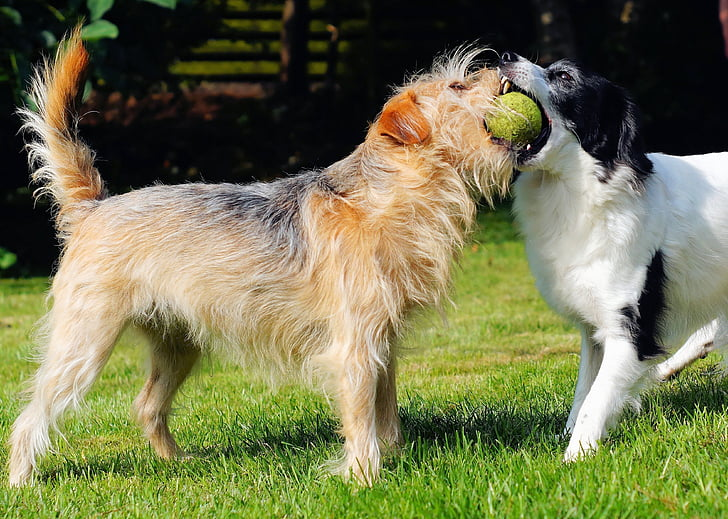

In [18]:
Image(filename="/tmp/dogs_playing.jpg", width=500, height=500) 


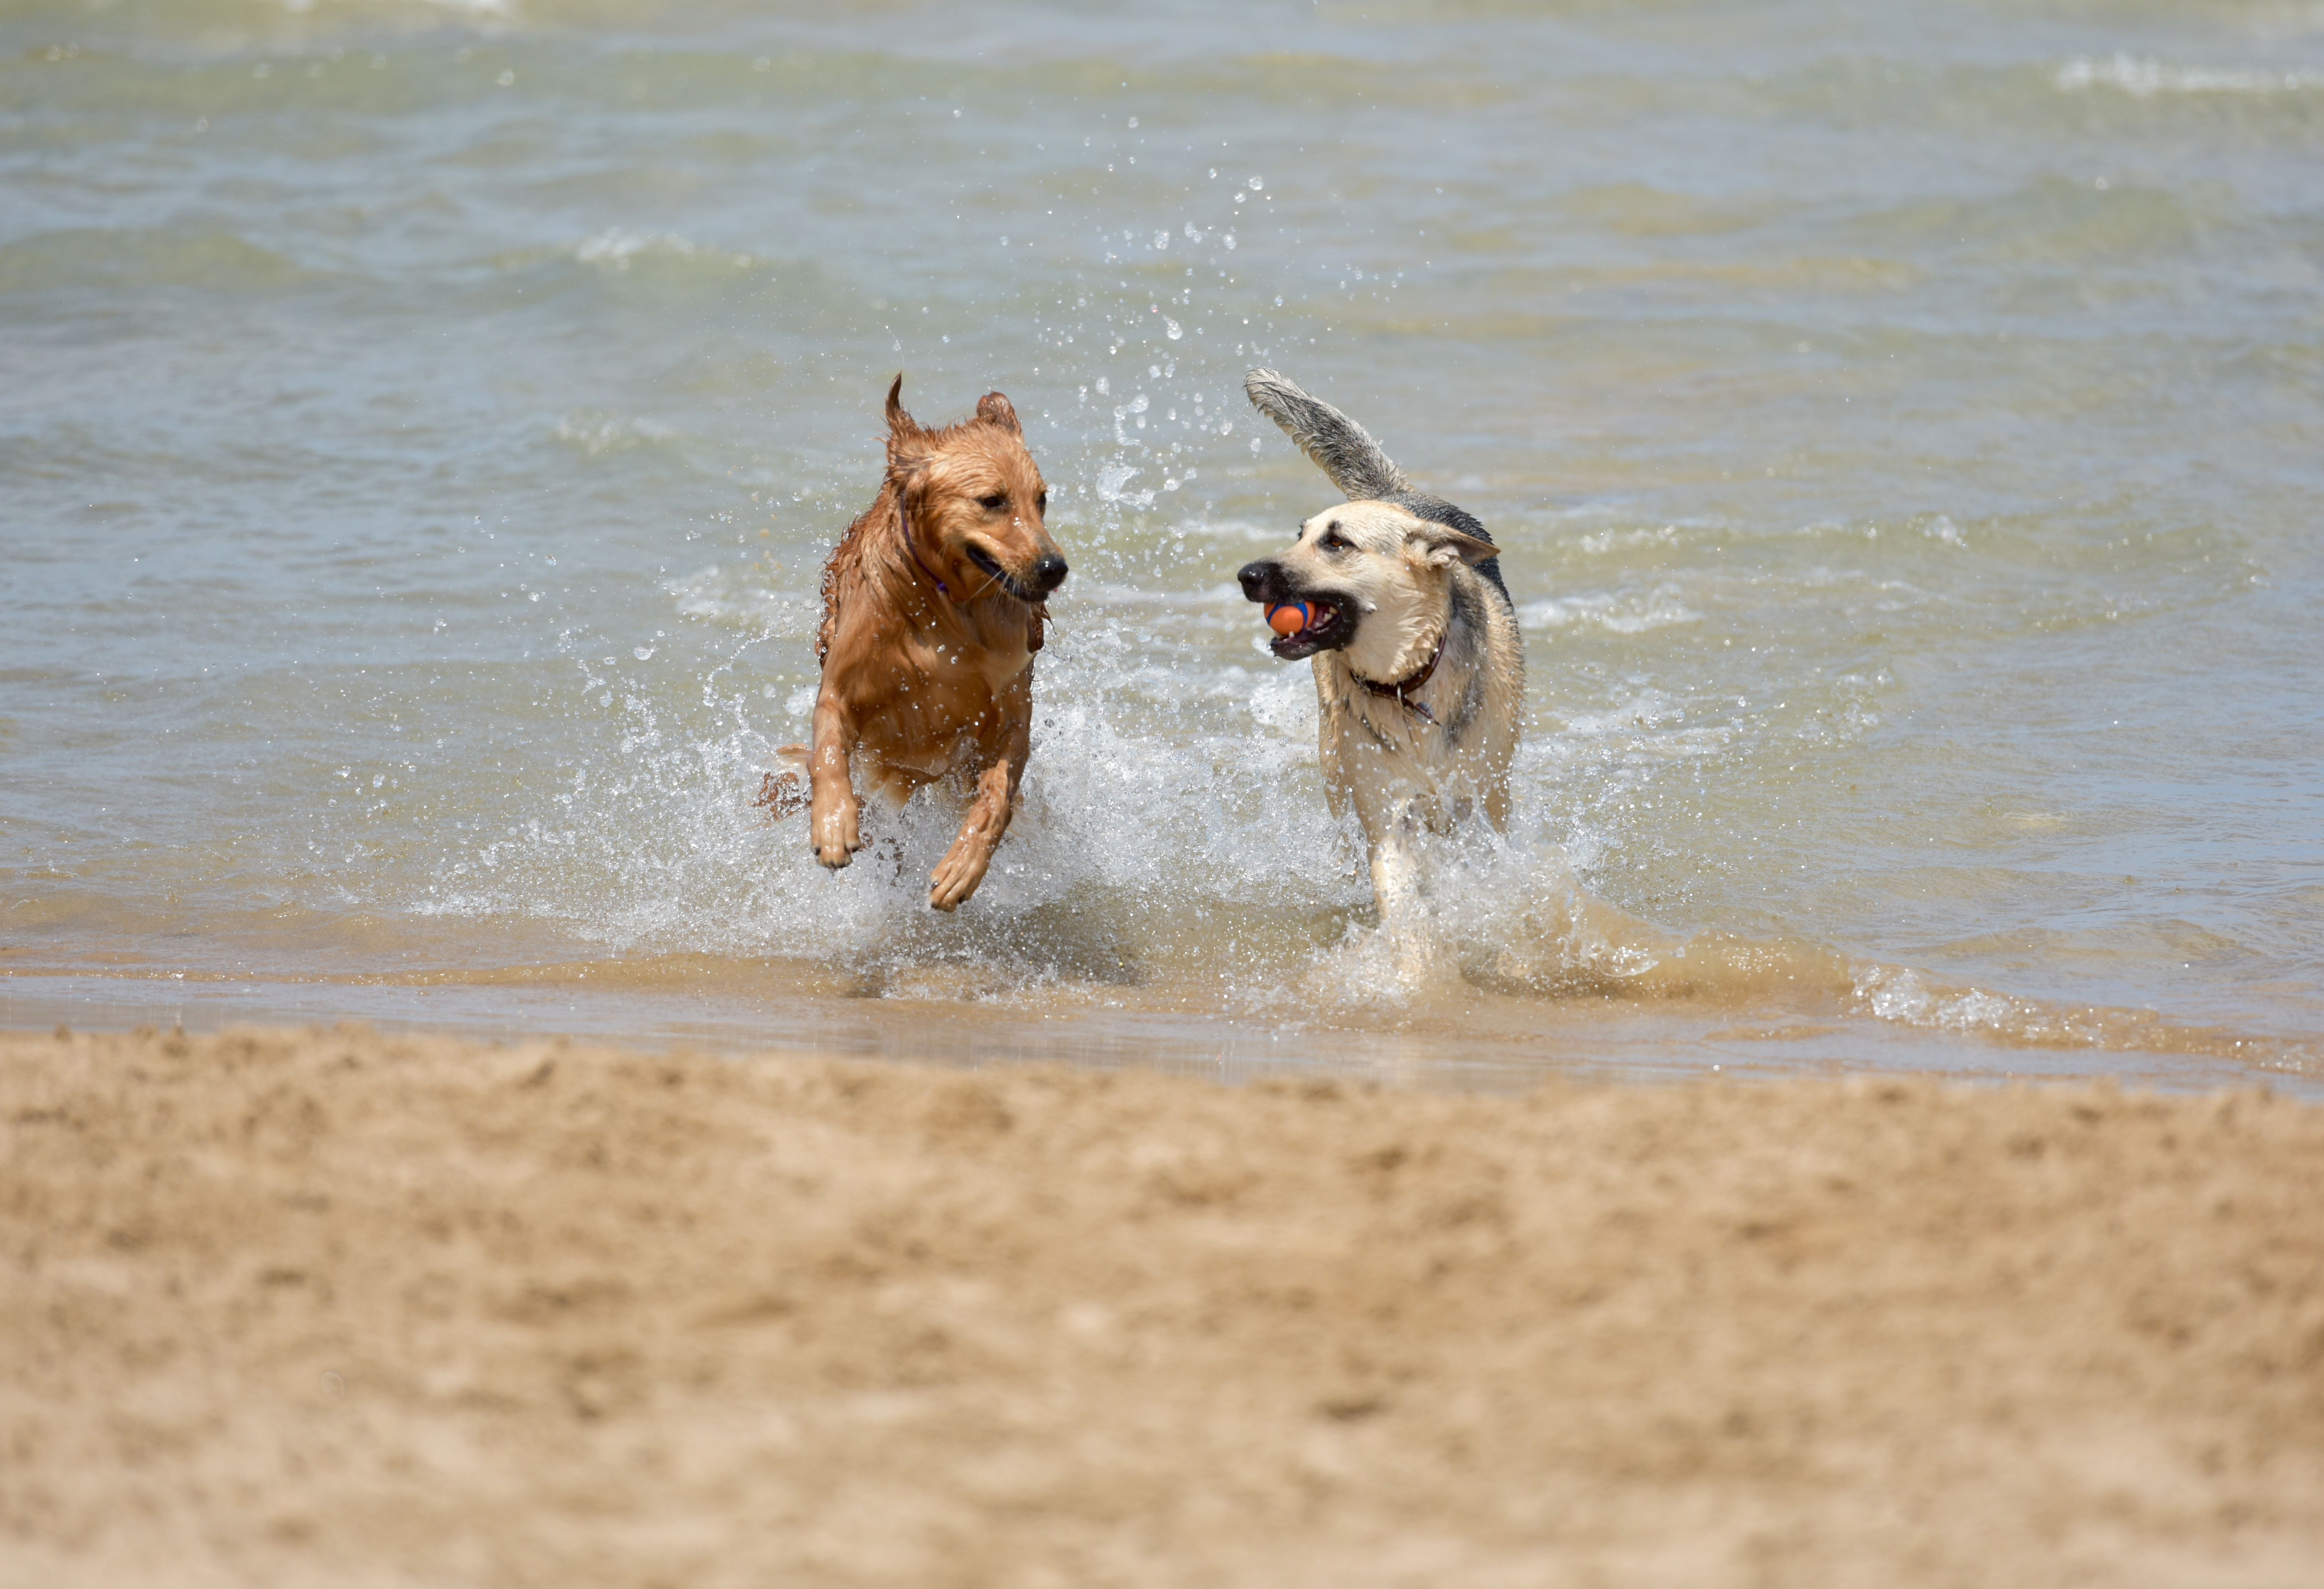

In [19]:
Image(filename="/tmp/dogs_playing_02.jpg", width=500, height=500) 


image of kitten playing

In [20]:
!wget https://cdn12.picryl.com/photo/2016/12/31/kittens-playing-animals-animals-cd49b7-1024.jpg -O /tmp/cats_playing.jpg


--2024-11-06 14:47:32--  https://cdn12.picryl.com/photo/2016/12/31/kittens-playing-animals-animals-cd49b7-1024.jpg
Resolving cdn12.picryl.com (cdn12.picryl.com)... 104.26.4.111, 104.26.5.111, 172.67.73.118, ...
Connecting to cdn12.picryl.com (cdn12.picryl.com)|104.26.4.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267733 (261K) [image/jpeg]
Saving to: ‘/tmp/cats_playing.jpg’

/tmp/cats_playing.j 100%[===================>] 261.46K  --.-KB/s    in 0.004s  

2024-11-06 14:47:32 (59.1 MB/s) - ‘/tmp/cats_playing.jpg’ saved [267733/267733]



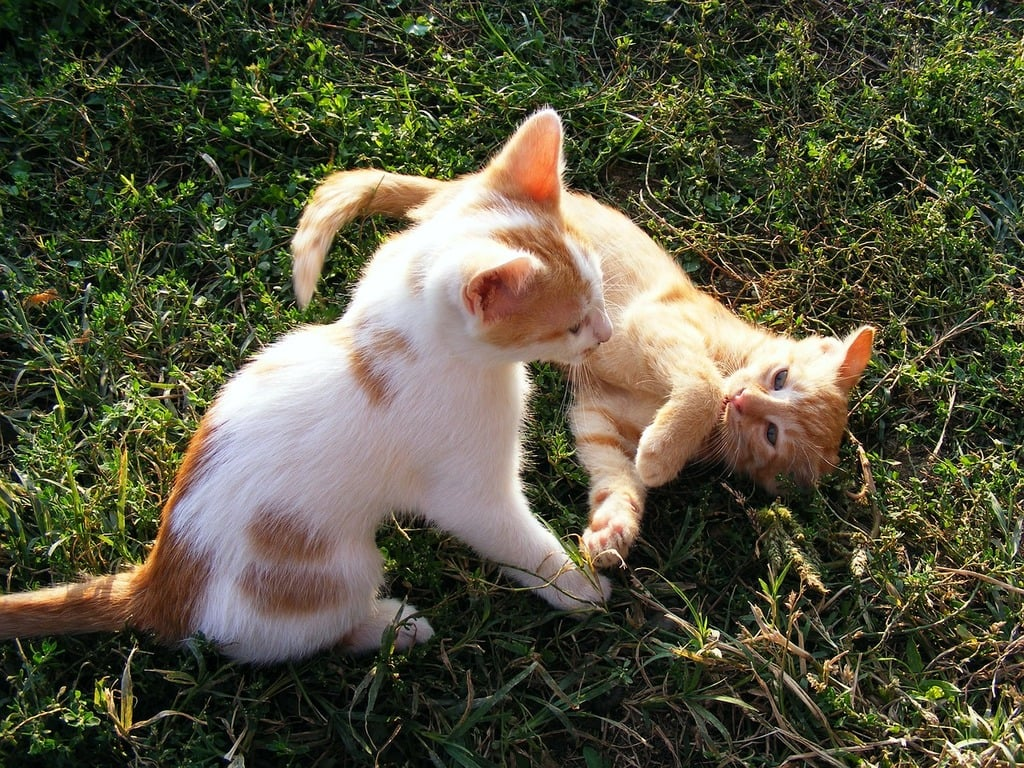

In [21]:
Image(filename="/tmp/cats_playing.jpg", width=500, height=500) 


apple on a table

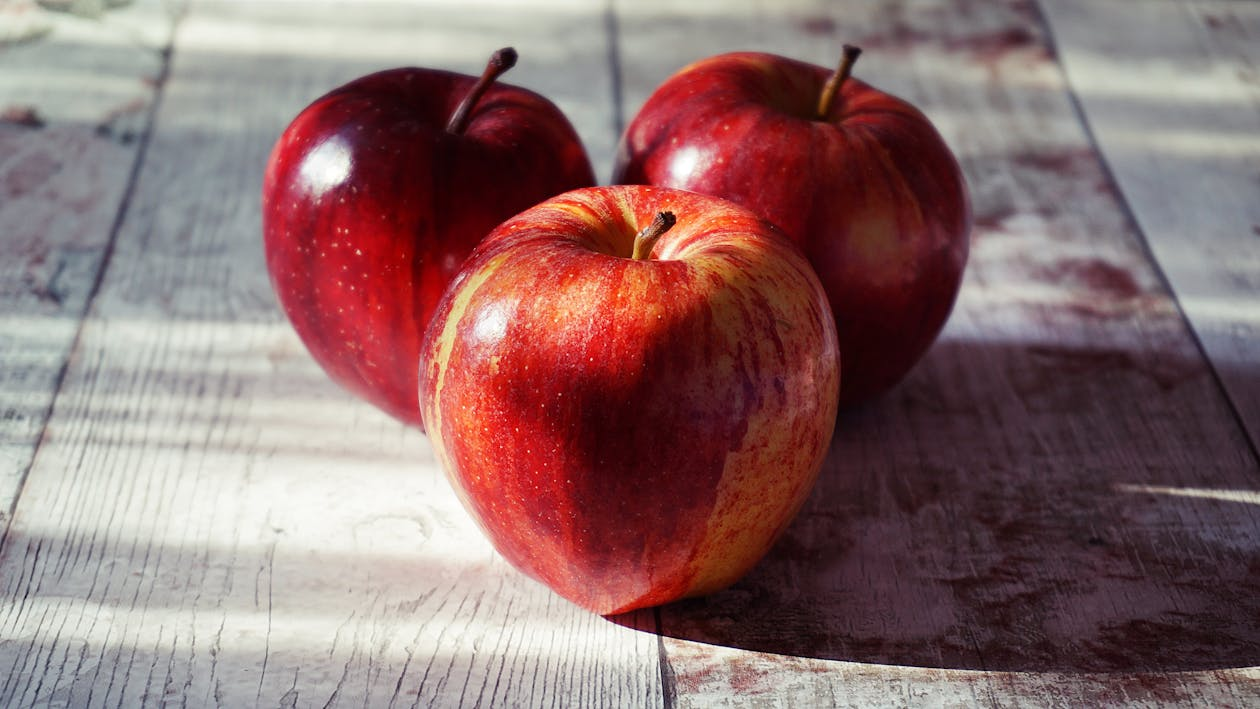

In [22]:
Image(filename="../images/apples_on_table.jpeg", width=500, height=500) 


In [23]:
img_embedding_dogs = clip_model.get_image_embedding("/tmp/dogs_playing.jpg")

img_embedding_dogs_02 = clip_model.get_image_embedding("/tmp/dogs_playing_02.jpg")


img_embedding_cats = clip_model.get_image_embedding("/tmp/cats_playing.jpg")

img_embedding_apple = clip_model.get_image_embedding("../images/apples_on_table.jpeg")

In [24]:
txt_embedding_dogs = clip_model.get_text_embedding("two dogs playing")



distance between two dog images

In [25]:
sklearn.metrics.pairwise.cosine_distances([img_embedding_dogs] , [img_embedding_dogs,img_embedding_dogs_02])

array([[0.        , 0.19744539]])

distance between dog and cat image

In [26]:
sklearn.metrics.pairwise.cosine_distances([img_embedding_dogs] , [img_embedding_cats])

array([[0.32686303]])

In [27]:
sklearn.metrics.pairwise.cosine_distances([img_embedding_dogs] , [txt_embedding_dogs])

array([[0.69662752]])

distance between text embedding and the different images

We see the dog embedding is closer than other images.

In [28]:
sklearn.metrics.pairwise.cosine_distances(
    
    [txt_embedding_dogs] , 
    
    [img_embedding_dogs, img_embedding_dogs_02, img_embedding_cats, img_embedding_apple]

)

array([[0.69662752, 0.68308759, 0.7164624 , 0.85336076]])

## Notes

We covered
- how to generate text image
- how to generate text / image encoding from a multi modal (Clip)